In [1]:
import numpy as np
import pandas as pd
import scipy

from IPython.display import clear_output

import sys
sys.path.append('../../../../Documents/GitHub/gustav/src/')

from gustav import ebi, ncbi, nlm, biogrid, nih, openalex
from gustav import publications
from gustav import github
from gustav import access_framework
from gustav import mapper

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../general/src/')
from manuscript import export
from manuscript import inout
from manuscript import datasets
from manuscript import tools

from sklearn.metrics import auc
from scipy.stats import fisher_exact
pd.options.display.precision = 3
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = 20

import gc
import re
import json
from tqdm.auto import tqdm
from statsmodels.stats.multitest import multipletests

# Figure S25

In [2]:
source_id = 'pone'
p_val_df = pd.read_csv('../data/240405_' + source_id + '_editor_p_values.csv')
alt_p_val_df = pd.read_csv('../data/240405_' + source_id + '_editor_p_values_alternate.csv')

In [3]:
for val in ['retract', 'pubpeer', 'short']:
    a = set(p_val_df[p_val_df[val + '_q_val'] < 0.05]['editor'].values)
    b = set(alt_p_val_df[alt_p_val_df[val + '_q_val'] < 0.05]['editor'].values)
    print(val)
    print('Original flagged: ')
    print(len(a))
    print('Alternate flagged: ')
    print(len(b))
    print('Union: ')
    print(len(a | b))
    print('Intersection: ')
    print(len(a & b))

retract
Original flagged: 
22
Alternate flagged: 
22
Union: 
22
Intersection: 
22
pubpeer
Original flagged: 
33
Alternate flagged: 
33
Union: 
33
Intersection: 
33
short
Original flagged: 
88
Alternate flagged: 
88
Union: 
88
Intersection: 
88


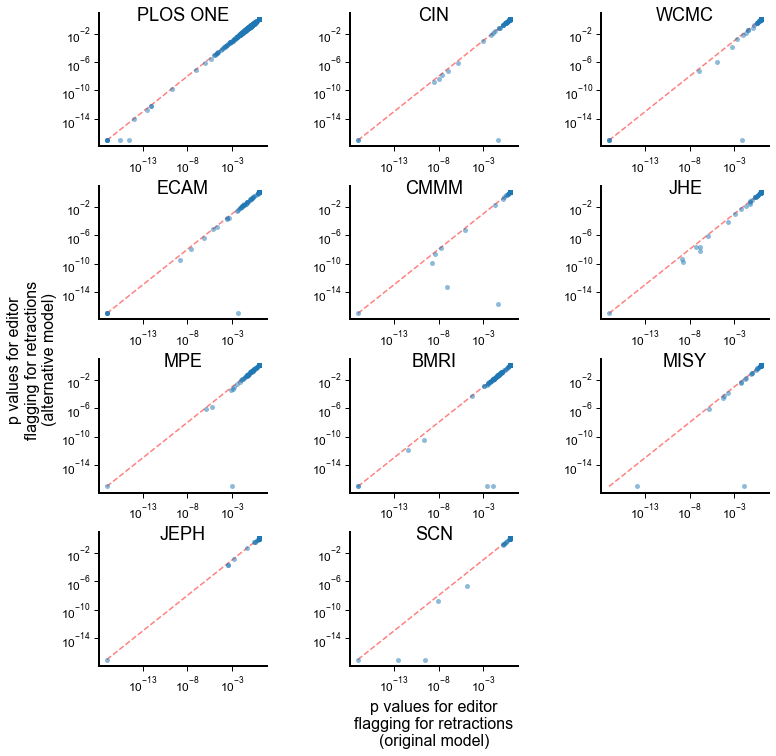

In [4]:
fig, axes = plt.subplots(figsize=(12,12), nrows=4, ncols=3, gridspec_kw={'hspace':0.3, 'wspace':0.5})

for source_id, ax in zip(['pone', 'CIN', 'WCMC', 'ECAM', 'CMMM', 'JHE', 'MPE', 'BMRI', 'MISY', 'JEPH', 'SCN'],
                         axes.flatten()):
    p_val_df = pd.read_csv('../data/240405_' + source_id + '_editor_p_values.csv')
    alt_p_val_df = pd.read_csv('../data/240405_' + source_id + '_editor_p_values_alternate.csv')
    compare_df = pd.merge(p_val_df, alt_p_val_df, on='editor')
    ax.scatter(compare_df['retract_p_val_x'], compare_df['retract_p_val_y'], linewidth=0, s=25, alpha=0.5)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(source_id.replace('pone', 'PLOS ONE'), fontsize=18, y=0.9)
    ax.plot([1e-17,1], [1e-17,1], zorder=-1, linestyle='dashed', color='r', alpha=0.5)
for ax in axes.flatten():
    #ax.set_yscale('log')
    ax.set_xlabel('p values for editor\nflagging for retractions\n(original model)', fontsize=16)
    ax.set_ylabel('p values for editor\nflagging for retractions\n(alternative model)', fontsize=16)
    #ax.set_ylim([0.8, 5000])
    #ax.set_xlim([-0.5,20])
    ax.tick_params(width=1, length=5, which='major')
    ax.tick_params(width=1, length=2, which='minor')
    ax.tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [ax.spines[i].set_linewidth(2) for i in ax.spines]
    ax.set_xlabel('')
    ax.set_ylabel('')
    
axes[3][2].axis('off')
axes[3][1].set_xlabel('p values for editor\nflagging for retractions\n(original model)', fontsize=16)
axes[2][0].set_ylabel('p values for editor\nflagging for retractions\n(alternative model)', fontsize=16, y=1)

fig.savefig('../img/250426_comparing_alternative_models_all_journals.png', dpi=200, bbox_inches='tight')